# Single systems
In this section we present some examples of Qiskit implementations of the concepts introduced in this lesson.
## Vectors and matrices in Python
Qiskit uses the Python programming language, so before discussing Qiskit specifically it may be helpful to very briefly discuss matrix and vector computations in Python. In Python, matrix and vector computations can be performed using the `array` class from the `NumPy` library (which includes many additional components for numerical computation).

Here is an example of a code cell that defines two vectors, `ket0` and `ket1`, corresponding to the qubit state vectors ∣0⟩ and ∣1⟩, and displays their average.



In [1]:
from numpy import array

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)

array([0.5, 0.5])

It is not actually necessary to explicitly use the `display` command to see the result of this computation. We may instead simply write the expression of interest as the last line of the code cell, and it will be returned as its output:

In [2]:
ket0 / 2 + ket1 / 2

array([0.5, 0.5])

This code cell also illustrates that running code cells sequentially on a given page of this textbook has a cumulative effect, so it is not necessary to reload the `array` class or define `ket0` and `ket1` again. Reloading the page or switching to another page will, however, reset everything to its initial state.

As a general guideline, code cells within each subsection of this course are intended to be run sequentially. So, if running a code cell generates an error, be sure to first run all previous code cells within the subsection in which that code cell appears.

We can also use `array` to create matrices that represent operations.

In [3]:
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])

M1 / 2 + M2 / 2

array([[1. , 1. ],
       [0.5, 0. ]])

Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the `matmul` function from `NumPy`:

In [4]:
from numpy import matmul

display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

## States, measurements, and operations
Qiskit includes several classes that allow for states, measurements, and operations to be easily created and manipulated — so starting from scratch and programming everything that is needed to simulate quantum states, measurements, and operations in Python is not required. Some examples to get started are included below.
### Defining and displaying state vectors
Qiskit's `Statevector` class provides functionality for defining and manipulating quantum state vectors. The following code cell imports the `Statevector` class and defines a few vectors using it. (Note that we need the `sqrt` function from the `NumPy` library to compute the square roots for the vector `u`.)

In [5]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


The `Statevector` class provides a `draw` method for displaying state vectors, including `latex` and `text` options for different visualizations, as this code cell demonstrates:

In [6]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The `Statevector` class also includes the `is_valid` method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [7]:
display(u.is_valid())
display(w.is_valid())

True

False

### Simulating measurements using `Statevector`
Next we will see one way that measurements of quantum states can be simulated in Qiskit, using the `measure` method from the `Statevector` class.

First, we create a qubit state vector `v` and then display it.

In [8]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

Code cells can be modified — so go ahead and change the specification of the vector if you wish.

Next, running the `measure` method simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.

In [9]:
v.measure()

('1',
 Statevector([ 0.+0.j, -1.+0.j],
             dims=(2,)))

Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.

For the particular example of the vector `v` defined above, the `measure` method defines the quantum state vector after the measurement takes place to be
$$
\frac{1+2i}{\sqrt{5}}\ket{0}
$$
(rather than ∣0⟩) or
$$
−\ket{1}
$$
(rather than ∣1⟩), depending on the measurement outcome. In both cases the alternatives are, in fact, equivalent — they are said to *differ by a global phase* because one is equal to the other multiplied by a complex number on the unit circle. This issue is discussed in greater detail in Lesson 3, and can safely be ignored for now.

As an aside, `Statevector` will throw an error if the `measure` method is applied to an invalid quantum state vector. Feel free to give it a try if you're interested in seeing what an error looks like.

`Statevector` also comes with a `sample_counts` method that allows for the simulation of any number of measurements on the system. For example, the following cell shows the outcome of measuring the vector `v` 1000 times, which (with high probability) results in the outcome 0 approximately 5 out of every 9 times (or about 556 of the 1000 trials) and the the outcome 1 approximately 4 out of every 9 times (or about 444 out of the 1000 trials). The cell also demonstrates the `plot_histogram` function for visualizing the results.

{'0': 537, '1': 463}

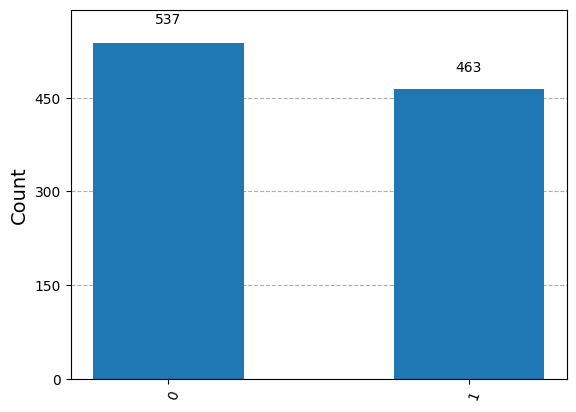

In [10]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)

Running the cell multiple times and trying different numbers of samples in place of 1000 may be helpful for developing some intuition for how the number of trials influences the estimated probabilities.
### Performing operations with `Operator` and `Statevector`
Unitary operations can be defined and performed on state vectors in Qiskit using the `Operator` class, as in the example that follows.

In [11]:
from qiskit.quantum_info import Operator

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])

v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)
v.draw("latex")
#v.draw("text")

<IPython.core.display.Latex object>

### Looking ahead toward quantum circuits
Quantum circuits won't be formally introduced until Lesson 3, but we can nevertheless experiment with composing qubit unitary operations using Qiskit's `QuantumCircuit` class. In particular, we may define a quantum circuit (which in this case will simply be a sequence of unitary operations performed on a single qubit) as follows.

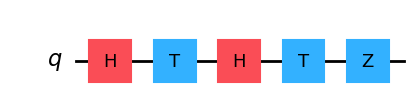

In [12]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw(output="mpl")

The operations are applied sequentially, starting on the left and ending on the right in the figure. Let us first initialize a starting quantum state vector and then evolve that state according to the sequence of operations.

In [13]:
ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
v.draw("latex")
#v.draw("text")

<IPython.core.display.Latex object>

Finally, let's simulate the result of running this experiment (i.e., preparing the state ∣0⟩, applying the sequence of operations represented by the circuit, and measuring) 4000 times.

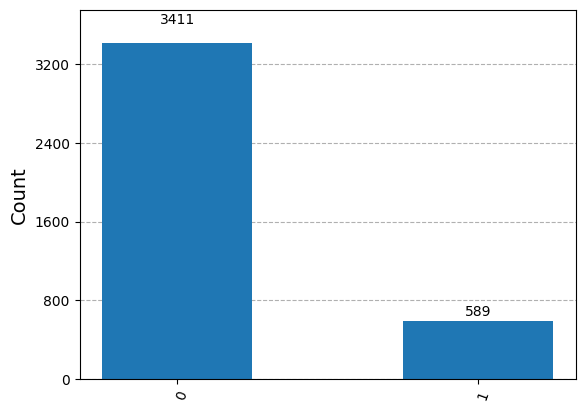

In [14]:
statistics = v.sample_counts(4000)
plot_histogram(statistics)

# Multiple systems
In the previous lesson, we learned about Qiskit's `Statevector` and `Operator` classes, and used them to simulate quantum systems. In this section, we'll use them to explore the behavior of multiple systems. We'll start by importing these classes, as well as the square root function from `NumPy`.

In [15]:
from qiskit.quantum_info import Statevector, Operator
from numpy import sqrt

## Tensor products
The `Statevector` class has a `tensor` method which returns the tensor product of itself and another `Statevector`.

For example, below we create two state vectors representing ∣0⟩ and ∣1⟩, and use the `tensor` method to create a new vector, ∣0⟩⊗∣1⟩.

In [16]:
zero, one = Statevector.from_label("0"), Statevector.from_label("1")
zero.tensor(one).draw("latex")

<IPython.core.display.Latex object>

In another example below, we create state vectors representing the ∣+⟩ and $\frac{1}{\sqrt{2}}(\ket{0}+i\ket{1})$ states, and combine them to create a new state vector. We'll assign this new vector to the variable `psi`.

In [17]:
plus = Statevector.from_label("+")
i_state = Statevector([1 / sqrt(2), 1j / sqrt(2)])
psi = plus.tensor(i_state)

psi.draw("latex")

<IPython.core.display.Latex object>

The `Operator` class also has a `tensor` method. In the example below, we create the 𝑋 and 𝐼 gates and display their tensor product.

In [18]:
X = Operator([[0, 1], [1, 0]])
I = Operator([[1, 0], [0, 1]])

X.tensor(I)

Operator([[0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


We can then treat these compound states and operations as we did single systems in the previous lesson. For example, in the cell below we calculate

(𝐼⊗𝑋)∣𝜓⟩

for the state `psi` we defined above. (The `^` operator tensors matrices together.)

In [19]:
psi.evolve(I ^ X).draw("latex")

<IPython.core.display.Latex object>

Below, we create a 𝐶𝑋 operator and calculate 𝐶𝑋∣𝜓⟩.

In [20]:
CX = Operator(
    [
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
    ]
)

psi.evolve(CX).draw("latex")

<IPython.core.display.Latex object>

## Partial measurements
In the previous page, we used the `measure` method to simulate a measurement of the quantum state vector. This method returns two items: the simulated measurement result, and the new `Statevector` given this measurement.

By default, `measure` measures all qubits in the state vector, but we can provide a list of integers to only measure the qubits at those indices. To demonstrate, the cell below creates the state
$$
𝑊=\frac{1}{\sqrt{3}}(\ket{001}+\ket{010}+\ket{100})
$$
(Note that Qiskit is primarily designed for use with qubit-based quantum computers. As such, `Statevector` will try to interpret any vector with $2^𝑛$ elements as a system of 𝑛 qubits. You can override this by passing a `dims` argument to the constructor. For example, `dims=(4,2)` would tell Qiskit the system has one four-level system, and one two-level system (qubit).

In [21]:
W = Statevector([0, 1, 1, 0, 1, 0, 0, 0] / sqrt(3))
W.draw("latex")

<IPython.core.display.Latex object>

The cell below simulates a measurement on the rightmost qubit (which has index 0). The other two qubits are not measured.

In [22]:
result, new_sv = W.measure([0])  # measure qubit 0
print(f"Measured: {result}\nState after measurement:")
new_sv.draw("latex")

Measured: 1
State after measurement:


<IPython.core.display.Latex object>

Try running the cell a few times to see different results. Notice that measuring a `1` means that we know both the other qubits are ∣0⟩, but measuring a `0` means the remaining two qubits are in the state $\frac{1}{\sqrt{2}}(\ket{01}+\ket{10})$.
# Quantum circuits
Now let's see how we can specify this circuit in Qiskit, beginning with the imports needed for the current section.

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram

To begin, we can create the circuit as follows, by sequentially adding gates from left to right.

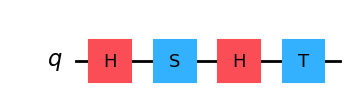

In [24]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)

display(circuit.draw(output='mpl'))

The default names for qubits in Qiskit are 𝑞0, 𝑞1, 𝑞2, etc., and when there is just a single qubit like in our example, the default name is 𝑞 rather than 𝑞0. If we wish to choose our own name we can do this using the `QuantumRegister` class like this:

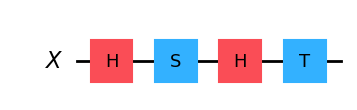

In [25]:
X = QuantumRegister(1, "X")
circuit = QuantumCircuit(X)

circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)

display(circuit.draw(output='mpl'))

Here is an implementation of this circuit using Qiskit:

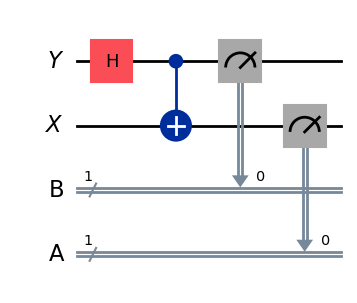

In [26]:
X = QuantumRegister(1, "X")
Y = QuantumRegister(1, "Y")
A = ClassicalRegister(1, "A")
B = ClassicalRegister(1, "B")

circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)

display(circuit.draw(output='mpl'))

The circuit can be simulated using the `Sampler` primitive.

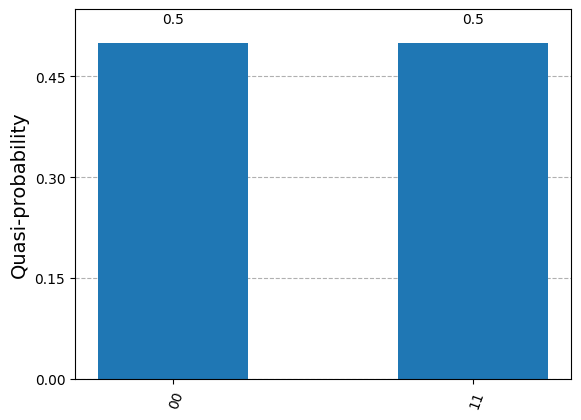

In [27]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
display(plot_histogram(statistics))

# Entanglement in action
## Teleportation

In [28]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

Here is a quantum circuit implementation of the teleportation protocol.

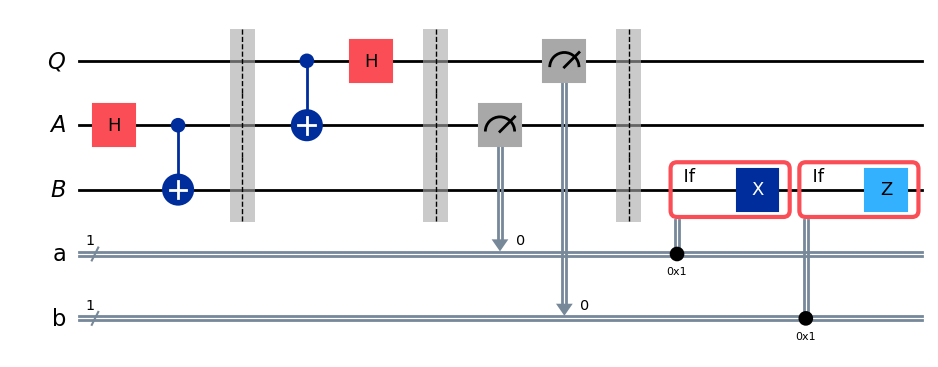

In [29]:
qubit = QuantumRegister(1, "Q")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")
a = ClassicalRegister(1, "a")
b = ClassicalRegister(1, "b")

protocol = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Prepare ebit used for teleportation
protocol.h(ebit0)
protocol.cx(ebit0, ebit1)
protocol.barrier()

# Alice's operations
protocol.cx(qubit, ebit0)
protocol.h(qubit)
protocol.barrier()

# Alice measures and sends classical bits to Bob
protocol.measure(ebit0, a)
protocol.measure(qubit, b)
protocol.barrier()

# Bob uses the classical bits to conditionally apply gates
with protocol.if_test((a, 1)):
    protocol.x(ebit1)
with protocol.if_test((b, 1)):
    protocol.z(ebit1)

display(protocol.draw(output="mpl"))

The circuit makes use of a few features of Qiskit that we've not yet seen in previous lessons, including the `barrier` and `if_test` functions. The `barrier` function creates a visual separation making the circuit diagram more readable, and it also prevents Qiskit from performing various simplifications and optimizations across barriers during compilation when circuits are run on real hardware. The `if_test` function applies an operation conditionally depending on a classical bit or register.

The circuit first initializes (𝐴, 𝐵) to be in a $\ket{𝜙^+}$ state (which is not part of the protocol itself), followed by Alice's operations, then her measurements, and finally Bob's operations.

To test that the protocol works correctly, we'll apply a randomly generated single-qubit gate to the initialized ∣0⟩ state of 𝑄 to obtain a random quantum state vector to be teleported. By applying the inverse (i.e., conjugate transpose) of that gate to 𝐵 after the protocol is run, we can verify that the state was teleported by measuring to see that it has returned to the ∣0⟩ state.

First we'll randomly choose a unitary qubit gate.

In [30]:
random_gate = UGate(
    theta=random.random() * 2 * pi,
    phi=random.random() * 2 * pi,
    lam=random.random() * 2 * pi,
)

display(random_gate.to_matrix())

array([[-0.94000723+0.j        ,  0.31102394+0.14018031j],
       [-0.28928314+0.18083605j, -0.93142361+0.12674246j]])

Now we'll create a new testing circuit that first applies our random gate to 𝑄, then runs the teleportation circuit, and finally applies the inverse of our random gate to the qubit 𝐵 and measures. The outcome should be 0 with certainty.

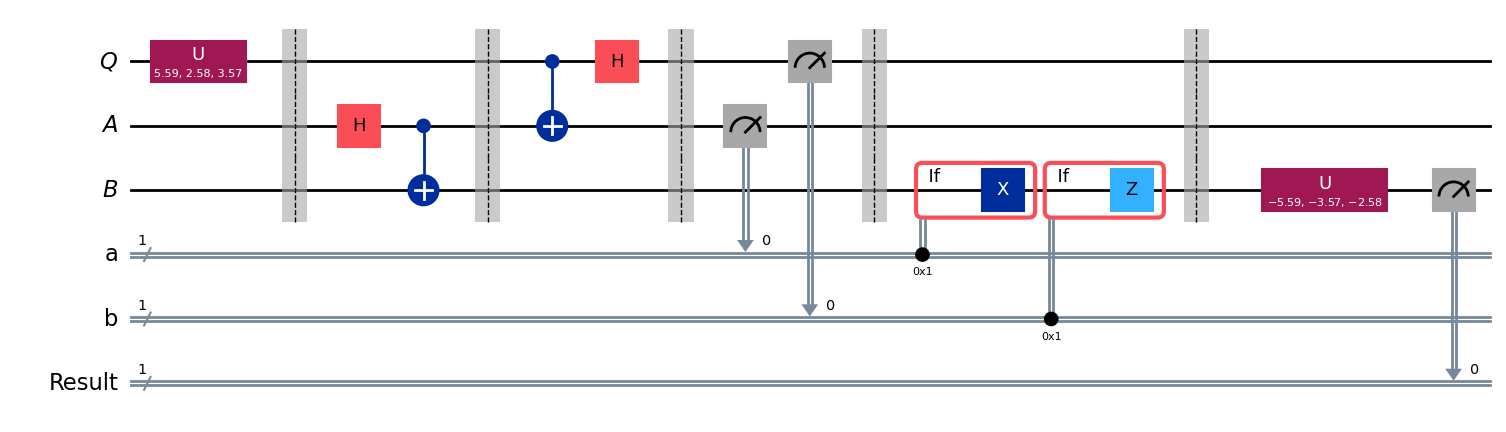

In [31]:
# Create a new circuit including the same bits and qubits used in the
# teleportation protocol.

test = QuantumCircuit(qubit, ebit0, ebit1, a, b)

# Start with the randomly selected gate on Q

test.append(random_gate, qubit)
test.barrier()

# Append the entire teleportation protocol from above.

test = test.compose(protocol)
test.barrier()

# Finally, apply the inverse of the random unitary to B and measure.

test.append(random_gate.inverse(), ebit1)

result = ClassicalRegister(1, "Result")
test.add_register(result)
test.measure(ebit1, result)

display(test.draw(output="mpl"))

Finally let's run the Aer simulator on this circuit and plot a histogram of the outputs. We'll see the statistics for all three classical bits: the bottom/leftmost bit should always be 0, indicating that the qubit 𝑄 was successfully teleported into 𝐵, while the other two bits should be roughly uniform.

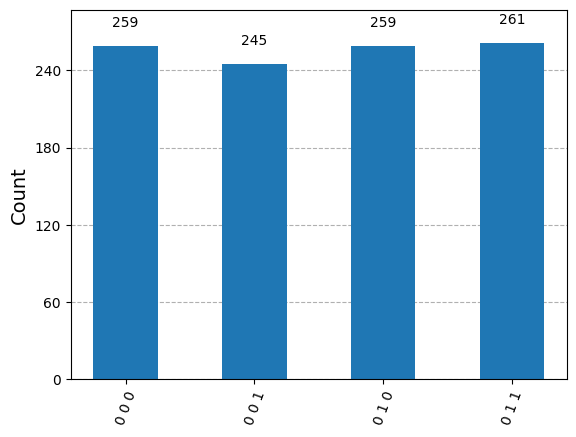

In [32]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

We can also filter the statistics to focus just on the test result qubit if we wish, like this:

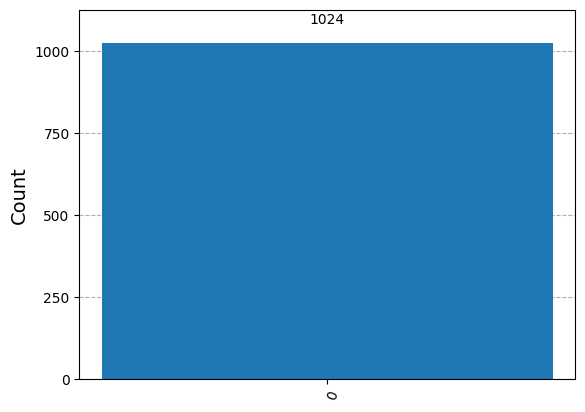

In [33]:
filtered_statistics = marginal_distribution(statistics, [2])
display(plot_histogram(filtered_statistics))

## Superdense coding

In [34]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer.primitives import Sampler
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Here is a simple implementation of superdense coding where we specify the circuit itself depending on the bits to be transmitted. First let's specify the bits to be transmitted. (Try changing the bits to see that it works correctly.)

In [35]:
c = "1"
d = "0"

Now we'll build the circuit accordingly. Here we'll just allow Qiskit to use the default names for the qubits: 𝑞0 for the top qubit and 𝑞1 for the bottom one.

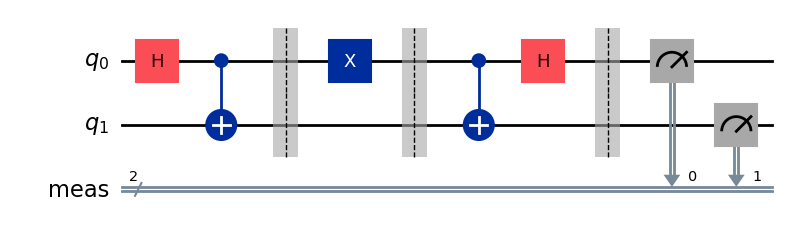

In [36]:
protocol = QuantumCircuit(2)

# Prepare ebit used for superdense coding
protocol.h(0)
protocol.cx(0, 1)
protocol.barrier()

# Alice's operations
if d == "1":
    protocol.z(0)
if c == "1":
    protocol.x(0)
protocol.barrier()

# Bob's actions
protocol.cx(0, 1)
protocol.h(0)
protocol.measure_all()

display(protocol.draw(output='mpl'))

Not much is new here, except the `measure_all` function, which measures all of the qubits and puts the results into a single classical register (therefore having two bits in this case).

Running the Aer simulator produces the expected output.

Measured 10 with frequency 1.0


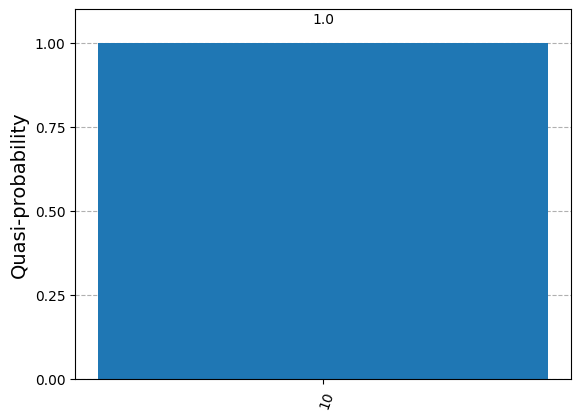

In [37]:
result = Sampler().run(protocol).result()
statistics = result.quasi_dists[0].binary_probabilities()

for outcome, frequency in statistics.items():
    print(f"Measured {outcome} with frequency {frequency}")

display(plot_histogram(statistics))

Just for fun, we can use an additional qubit as a random bit generator to randomly choose 𝑐 and 𝑑, then run the superdense coding protocol to see that these bits are transmitted correctly.

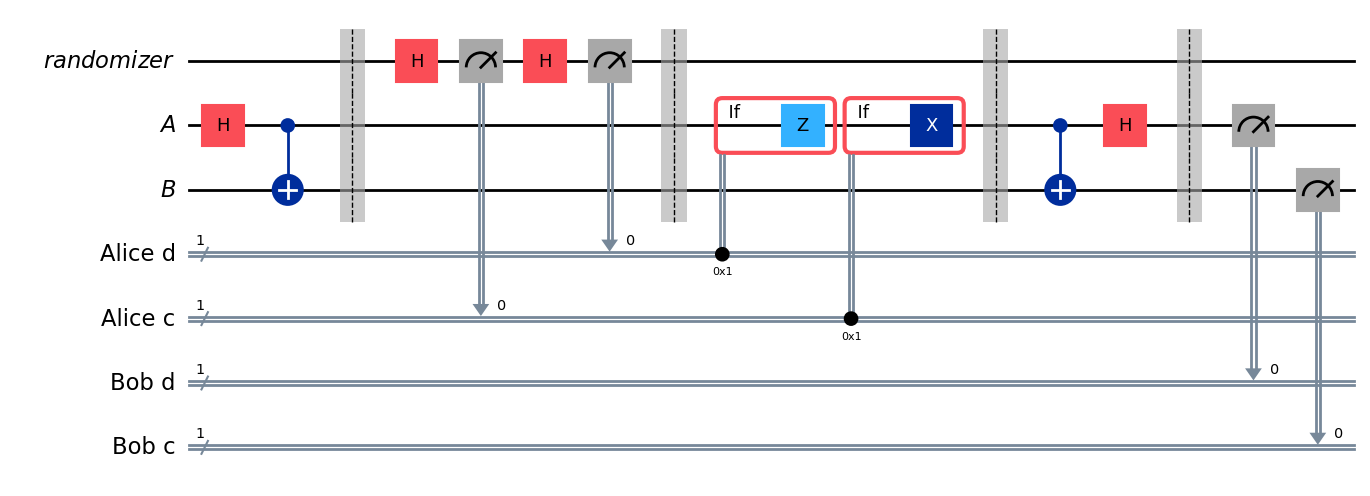

In [38]:
rbg = QuantumRegister(1, "randomizer")
ebit0 = QuantumRegister(1, "A")
ebit1 = QuantumRegister(1, "B")

Alice_c = ClassicalRegister(1, "Alice c")
Alice_d = ClassicalRegister(1, "Alice d")

test = QuantumCircuit(rbg, ebit0, ebit1, Alice_d, Alice_c)

# Initialize the ebit
test.h(ebit0)
test.cx(ebit0, ebit1)
test.barrier()

# Use the 'randomizer' qubit twice to generate Alice's bits c and d.
test.h(rbg)
test.measure(rbg, Alice_c)
test.h(rbg)
test.measure(rbg, Alice_d)
test.barrier()

# Now the protocol runs, starting with Alice's actions, which depend
# on her bits.
with test.if_test((Alice_d, 1), label="Z"):
    test.z(ebit0)
with test.if_test((Alice_c, 1), label="X"):
    test.x(ebit0)
test.barrier()

# Bob's actions
test.cx(ebit0, ebit1)
test.h(ebit0)
test.barrier()

Bob_c = ClassicalRegister(1, "Bob c")
Bob_d = ClassicalRegister(1, "Bob d")
test.add_register(Bob_d)
test.add_register(Bob_c)
test.measure(ebit0, Bob_d)
test.measure(ebit1, Bob_c)

display(test.draw(output='mpl'))

Running the Aer simulator shows the results: Alice and Bob's classical bits always agree.

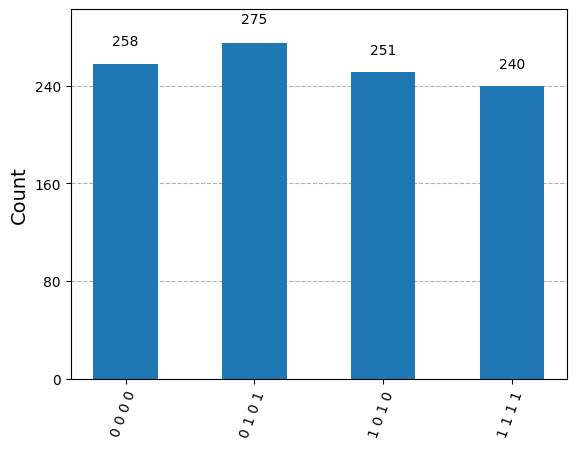

In [39]:
result = AerSimulator().run(test).result()
statistics = result.get_counts()
display(plot_histogram(statistics))

## The CHSH game

In [40]:
# Required imports

from qiskit import QuantumCircuit
from qiskit_aer.primitives import Sampler
from numpy import pi
from numpy.random import randint

We can implement the CHSH game together with the quantum strategy defined above in Qiskit as follows.

First, here's the definition of the game itself, which allows an arbitrary strategy to be plugged in as an argument.

In [41]:
def chsh_game(strategy):
    """Plays the CHSH game
    Args:
        strategy (callable): A function that takes two bits (as `int`s) and
            returns two bits (also as `int`s). The strategy must follow the
            rules of the CHSH game.
    Returns:
        int: 1 for a win, 0 for a loss.
    """
    # Referee chooses x and y randomly
    x, y = randint(0, 2), randint(0, 2)

    # Use strategy to choose a and b
    a, b = strategy(x, y)

    # Referee decides if Alice and Bob win or lose
    if (a != b) == (x & y):
        return 1  # Win
    return 0  # Lose

Now we'll create a function that outputs a circuit depending on the questions for Alice and Bob. We'll let the qubits have their default names for simplicity, and we'll use the built-in $𝑅_𝑦(𝜃)$ gate for Alice and Bob's actions.

In [42]:
def chsh_circuit(x, y):
    """Creates a `QuantumCircuit` that implements the best CHSH strategy.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        QuantumCircuit: Circuit that, when run, returns Alice and Bob's
            answer bits.
    """
    qc = QuantumCircuit(2, 2)
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    # Alice
    if x == 0:
        qc.ry(0, 0)
    else:
        qc.ry(-pi / 2, 0)
    qc.measure(0, 0)

    # Bob
    if y == 0:
        qc.ry(-pi / 4, 1)
    else:
        qc.ry(pi / 4, 1)
    qc.measure(1, 1)

    return qc

Here are the four possible circuits, depending on which questions are asked.

(x,y) = (0,0)


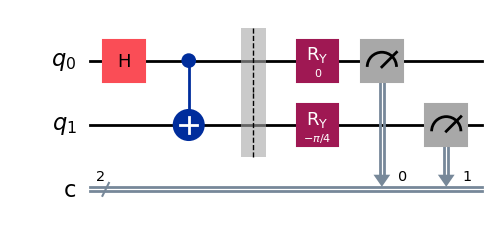

(x,y) = (0,1)


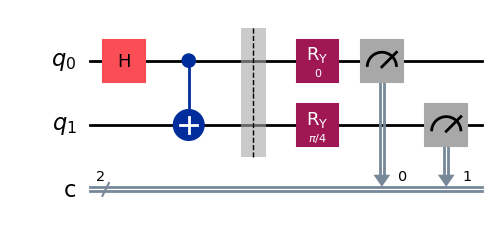

(x,y) = (1,0)


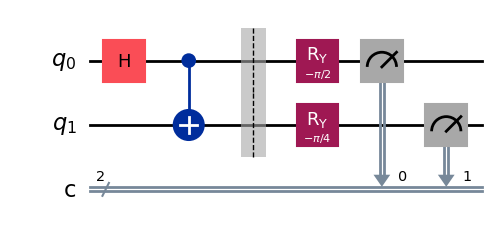

(x,y) = (1,1)


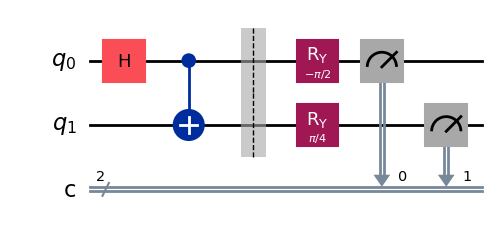

In [43]:
# Draw the four possible circuits

print("(x,y) = (0,0)")
display(chsh_circuit(0, 0).draw(output="mpl"))

print("(x,y) = (0,1)")
display(chsh_circuit(0, 1).draw(output="mpl"))

print("(x,y) = (1,0)")
display(chsh_circuit(1, 0).draw(output="mpl"))

print("(x,y) = (1,1)")
display(chsh_circuit(1, 1).draw(output="mpl"))

Now we'll create a job using the Aer simulator that runs the circuit a single time for a given input pair (𝑥, 𝑦).

In [44]:
sampler = Sampler()


def quantum_strategy(x, y):
    """Carry out the best strategy for the CHSH game.
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # `shots=1` runs the circuit once
    result = sampler.run(chsh_circuit(x, y), shots=1).result()
    statistics = result.quasi_dists[0].binary_probabilities()
    bits = list(statistics.keys())[0]
    a, b = bits[0], bits[1]
    return a, b

Finally, we'll play the game 1,000 times and compute the fraction of them that the strategy wins.

In [45]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(quantum_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.847


We can also define a classical strategy and see how well it works. Feel free to change the code to try out different strategies!

In [46]:
def classical_strategy(x, y):
    """An optimal classical strategy for the CHSH game
    Args:
        x (int): Alice's bit (must be 0 or 1)
        y (int): Bob's bit (must be 0 or 1)
    Returns:
        (int, int): Alice and Bob's answer bits (respectively)
    """
    # Alice's answer
    if x == 0:
        a = 0
    elif x == 1:
        a = 1

    # Bob's answer
    if y == 0:
        b = 1
    elif y == 1:
        b = 0

    return a, b

Again let's play the game 1,000 times to see how well it works.

In [47]:
NUM_GAMES = 1000
TOTAL_SCORE = 0

for _ in range(NUM_GAMES):
    TOTAL_SCORE += chsh_game(classical_strategy)

print("Fraction of games won:", TOTAL_SCORE / NUM_GAMES)

Fraction of games won: 0.769


Although there's randomness involved, the statistics are very unlikely to deviate too much after 1,000 runs. The quantum strategy wins about 85% of the time while a classical strategy can't win more than about 75% of the time.